# Обзор данных

In [115]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import seaborn as sns
import scipy.stats as stats

In [116]:
data = pd.read_csv('/datasets/hypothesis.csv')
data.columns = map(str.lower, data.columns)

# Часть 1. Приоритизация гипотез

In [118]:
data['ICE'] = round (data['impact'] * data['confidence'] / data['efforts'], 2)
data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending= False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


In [119]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending= False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод:**   
По фреймворку ICE наиболее приоритетными являются следующие гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

По фреймворку RICE наиболее приоритетные гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  

Важно отметить, что фреймворк RICE учитывает параметр Reach (скольких пользователей затронет изменение, которое вы хотите внести), в связи с чем в лидеры вышли гипотезы с наибольшим охватом пользователей.

# Часть 2. Анализ A/B-теста

In [120]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [122]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [123]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [124]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [125]:
orders.duplicated().sum()

0

In [126]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [127]:
visitors.duplicated().sum()

0

In [128]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [129]:
duplicate_visitors = orders[orders[['visitorId']].duplicated(keep=False)]

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
15,2550768810,2742574263,2019-08-15,15277,B
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


In [130]:
duplicate_visitors['visitorId'].nunique()

94

In [131]:
user_groups = orders.groupby('visitorId')['group'].nunique()
user_groups 

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [132]:
users_in_multiple_groups = user_groups[user_groups > 1]
users_in_multiple_groups_count = users_in_multiple_groups.count()
users_in_multiple_groups_count

58

In [133]:
ord_1 = orders['visitorId'].nunique()

In [134]:
round(users_in_multiple_groups_count * 100 / ord_1, 2)

5.63

Мы посчитали долю пользователей, которые встречаются в двух группах одновременно (она составила 5,63%). Учитывая незначительность количества таких пользователей, а также минимальное влияние на само исследование и достижение бизнес-целей, считаю правильным не удалять их и оставить в рамках последующего анализа.  

**Продолжим работу с данными с учетом данных пользователей.**

Дубликатов и пропусков нет. Тип данных приведен к необходимому для анализа

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [135]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

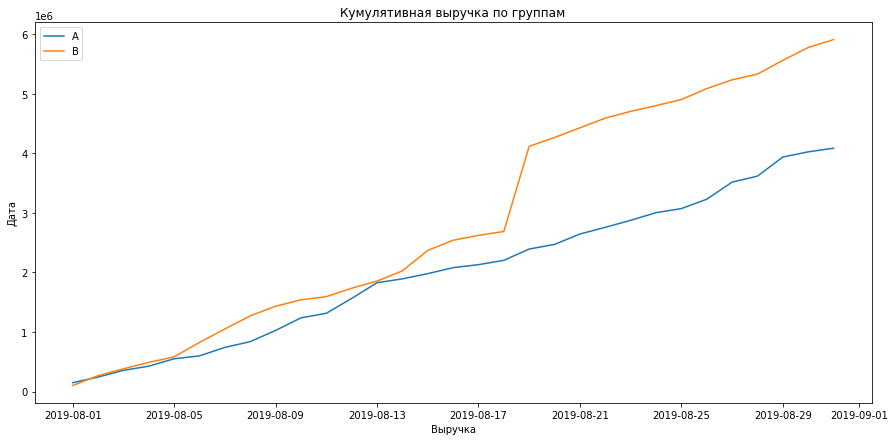

In [136]:
plt.figure(figsize = (15,7))
plt.title('Кумулятивная выручка по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Выручка')
plt.ylabel('Дата')
plt.legend()
plt.show()

По графику видно, что выручка в обеих группах растет. При этом с 05.08 в группе В показатель выручки стал выше того же показателя группы А. Показатели сравнились 13.08 числа, но дальше выручка группы В стабильно выше. С 18 на 19 число наблюдается резкое увеличение показателя выручки группы В: причиной может быть либо резкое увеличение числа продаж, либо иные причины.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

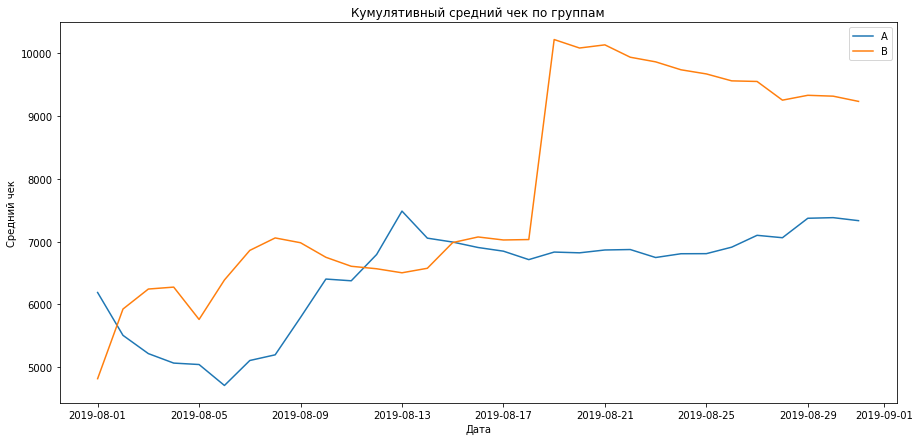

In [137]:
plt.figure(figsize = (15,7))
plt.title('Кумулятивный средний чек по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 

По графику видны достаточно резкие перепады как и у группы А, так и у группы В. В какие то периоды средний чек выше у группы А, в какие то наоборот - у группы В. У группы В также наблюдается резкий рост показателя среднего чека (возможно попали крупные заказы). К концу графика показатели стабилизируются.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

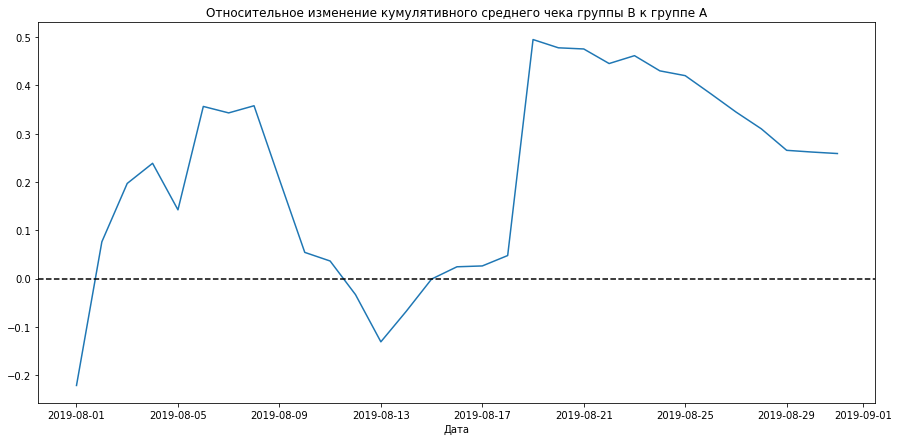

In [138]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (15,7))
# cтроим отношение средних чеков
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

По графику видно, что группа В в целом стабильно выше лучше группы А. При этом наблюдаются резкие скачки, что говорит о резких заказах или выбросах.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

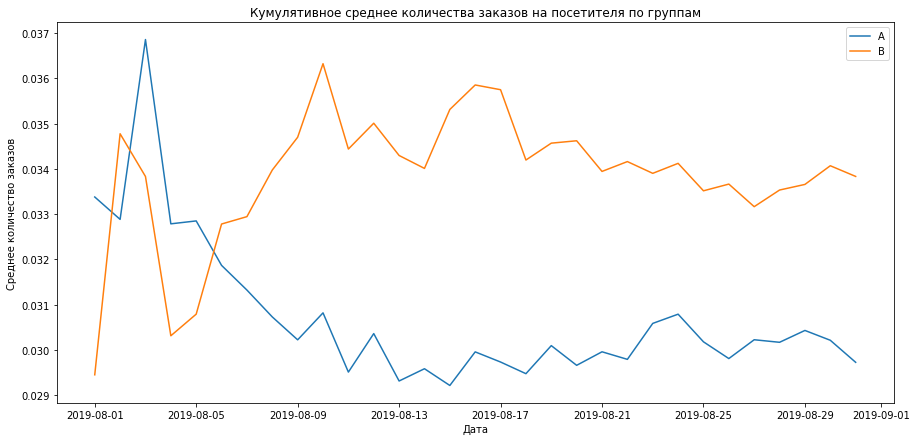

In [139]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (15,7))
plt.title('Кумулятивное среднее количества заказов на посетителя по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend()


Показатели групп А и В стабилизировались на 09.08.2019. Группа В стабильно показала лучший показатель среднего кол-ва покупок на посетителя с момента стабилизации.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

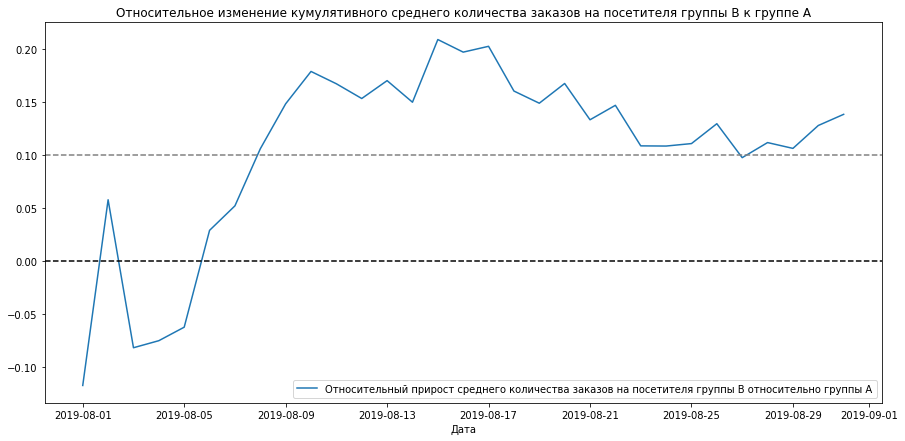

In [140]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (15,7))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.xlabel('Дата')
plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

Показатель среднего количества заказов на посетителя у группы В стабилизировался с 05.08.2019. При этом с 09.08.2019 показатель  группы В стабильно выше 10%.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

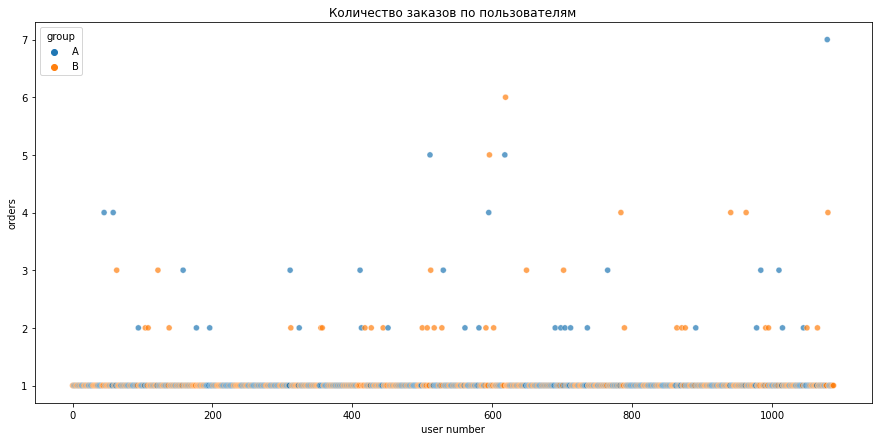

In [141]:
ordersByUsers = (
    orders.groupby(['visitorId','group'], as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId','group', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15, 7))
ax = sns.scatterplot(x=x_values, y="orders", hue='group',hue_order=['A', 'B'],
                     data=ordersByUsers, alpha=.7)
ax.set_title('Количество заказов по пользователям')
plt.xlabel('user number')
plt.show()

По графику видно, что большая часть покупателей заказывали только один раз. Вместе с этим, пользователей, совершивших от 2-х до 5-ти заказов, также не мало. Присутствуют пользователи, совершившие заказы 6-7 раз.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [142]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


- Не более 5% пользователей оформляли больше 2 заказов.
- Не более 1% пользователей заказывали больше 4-х раз.  

Стоит выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов. Все что выше - будем считать аномалией.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

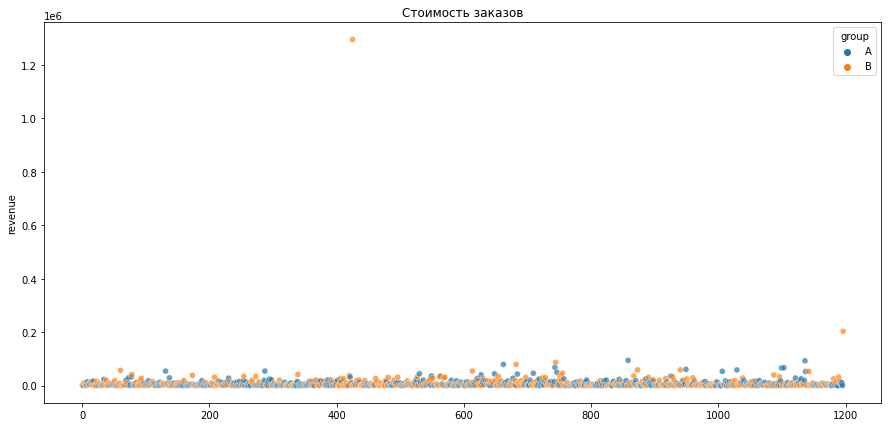

In [143]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 7))
ax = sns.scatterplot(x=x_values, y="revenue", hue='group',hue_order=['A', 'B'],
                     data=orders, alpha=.7)
ax.set_title('Стоимость заказов')
plt.show()

По графику видно, большинство заказов не превышает 20 000. Наблюдаются выбросы в 200 000 и даже в 1 200 000, которые относятся к группе В. У группы А значительных выбросов не наблюдается.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [144]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


- Не более 5% заказов дороже 28000 руб.
- Не более 1% заказов дороже 58233,2 руб. 

Стоит выбрать стоимость заказа в 28000 руб. за нижнюю границу. Все что выше - будем считать аномалией.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

In [145]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [146]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Т.к. в в данных есть большие (по сравнению с нормальным распределением) выбросы применим непараметрический критерий Манна-Уитни.

H_0:  Среднее количество заказов на посетителя группы А =  Среднее количество заказов на посетителя группы В

H_1: Среднее количество заказов на посетителя группы А != Среднее количество заказов на посетителя группы В

alpha = 0.05

In [147]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".')

print("Относительный прирост среднего количества заказов на посетителя группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.017
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".
Относительный прирост среднего количества заказов на посетителя группы B: 0.138


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

H_0:  Средний чек группы А =  Средний чек группы В

H_1: Средний чек группы А != Средний чек группы В

alpha = 0.05

In [148]:
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-значение: {:.3f}'.format(results[1]))
if (results[1] < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост среднего чека группы B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост среднего чека группы B: 0.259


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

In [149]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
59


Всего 59 аномальных пользователей. 

In [150]:
total_users = orders['visitorId'].nunique()

# Количество аномальных пользователей
abnormal_users = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
)

# Относительные потери
relative_losses = abnormal_users.shape[0] / total_users

print("Относительные потери пользователей: {:.2%}".format(relative_losses))

Относительные потери пользователей: 5.72%


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «очищенным» данным — с удалением аномальных пользователей.

H_0:  Среднее количество заказов на посетителя группы А =  Среднее количество заказов на посетителя группы В

H_1: Среднее количество заказов на посетителя группы А != Среднее количество заказов на посетителя группы В

alpha = 0.05

In [151]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".')

print("Относительный прирост среднего количества заказов на посетителя группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-значение: 0.018
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".
Относительный прирост среднего количества заказов на посетителя группы B: 0.145


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

H_0:  Средний чек группы А =  Средний чек группы В

H_1: Средний чек группы А != Средний чек группы В

alpha = 0.05

In [152]:
alpha = 0.05
results = stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print('p-значение: {:.3f}'.format(results))
if (results < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост среднего чека группы B: {0:.3f}".format(orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ))



p-значение: 0.961
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост среднего чека группы B: -0.014


###  Сделаем выводы по результатам теста 

Анализируя результаты A/B-тестирования мы пришли к следующим выводам:

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и по очищенным.
- График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется, хотя к концу периода наблюдения тоже показывает, что результаты группы B становятся лучше группы A. Но глядя на данные очищенные от аномальных пользователей мы видим, что средний чек практически не изменился и даже стал немного меньше по отношению к группе A.  

**Исходя из обнаруженных фактов, следует остановить тест, зафиксировать победу группы В и перейти к проверке следующей гипотезы.**